In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

In [ ]:
train_set = torchvision.datasets.CIFAR10(
      root = '/content/gdrive/My Drive/cifar-10-python.tar',
      train = True,
      download = True,
      transform = transforms.Compose([transforms.ToTensor()])
       )

train_loader = torch.utils.data.DataLoader(train_set,batch_size=100)

Files already downloaded and verified


In [ ]:
test_set = torchvision.datasets.CIFAR10(
      root = '/content/gdrive/My Drive/cifar-10-python.tar',
      train = False,
      download = True,
      transform = transforms.Compose([transforms.ToTensor()])
       )

test_loader = torch.utils.data.DataLoader(test_set,batch_size=100)

Files already downloaded and verified


labels: tensor([6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3,
        7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7,
        3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1])


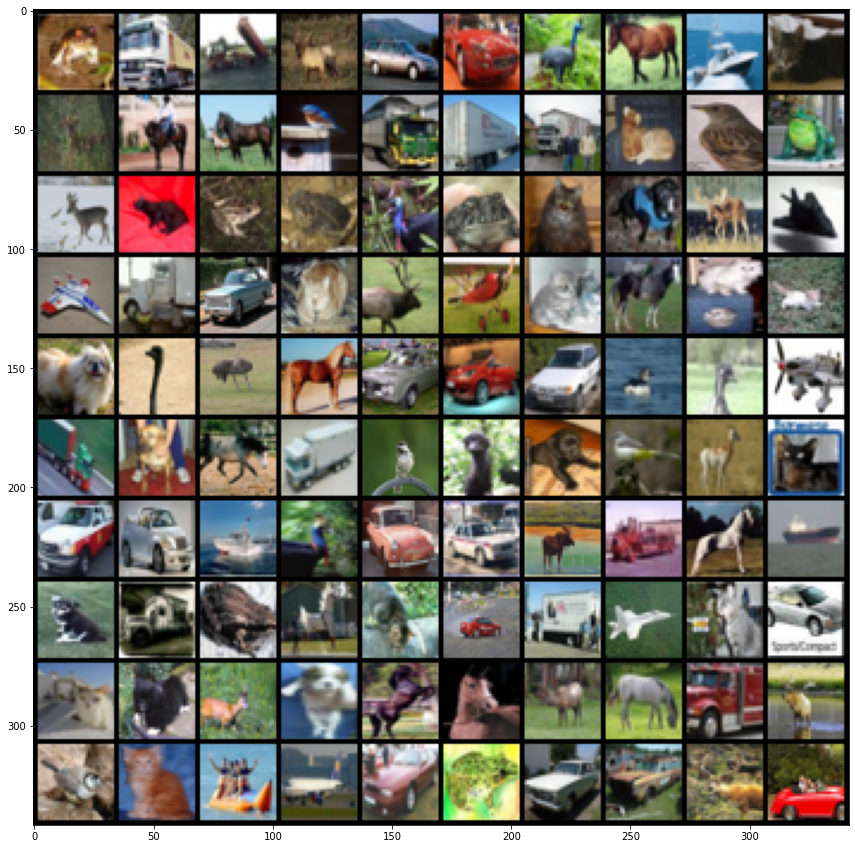

In [ ]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
import numpy as np
import matplotlib.pyplot as plt
torch.set_printoptions(linewidth=120)
batch = next(iter(train_loader))
images,labels = batch
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print('labels:',labels)

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(3,6,5)
    self.conv2 = nn.Conv2d(6,16,5)

    self.fc1 = nn.Linear(16*5*5,120)
    self.fc2 = nn.Linear(120,84)
    self.out = nn.Linear(84,10)
  
  def forward(self,t):
    t = t

    t = self.conv1(t)
    t = F.relu(t)
    t = F.max_pool2d(t,kernel_size=2,stride=2)

    t = self.conv2(t)
    t = F.relu(t)
    t = F.max_pool2d(t,kernel_size=2,stride=2)

    t = t.view(-1,16*5*5)
    t = self.fc1(t)
    t = F.relu(t)

    t = self.fc2(t)
    t = F.relu(t)

    t = self.out(t)
    t = F.softmax(t,dim=1)

    return t 

In [ ]:
torch.set_grad_enabled(False)
network = Network()
batch = next(iter(train_loader))
images,labels = batch

In [ ]:
preds= network(images)
def get_num_correct(preds,labels):
  correct = preds.argmax(dim=1).eq(labels).sum()
  return correct

get_num_correct(preds,labels)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


tensor(13)

In [ ]:
import torch.optim as optim
torch.set_grad_enabled(True)

loss = F.cross_entropy(preds,labels)
loss.item()

2.3005001544952393

In [ ]:
optimizer = optim.Adam(network.parameters(),lr=0.01)
preds = network(images)
loss = F.cross_entropy(preds,labels)
loss.backward()
optimizer.step()
print('loss1:',loss.item())
preds=network(images)
loss = F.cross_entropy(preds,labels)
print('loss2:',loss.item())

loss1: 2.3005001544952393
loss2: 2.290801763534546


In [ ]:
network = Network()
train_loader = torch.utils.data.DataLoader(train_set,batch_size=100)
optimizer = optim.Adam(network.parameters(),lr=0.001)

for epoch in range(22):
  total_loss = 0
  total_correct = 0
  for batch in train_loader:
    images,labels = batch
    preds = network(images)
    loss = F.cross_entropy(preds,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    total_loss += loss.item()
    total_correct += get_num_correct(preds,labels)
  print("epoch:",epoch,"total_correct:",total_correct,"loss:",total_loss) 

epoch: 0 total_correct: tensor(13036) loss: 1092.7407896518707
epoch: 1 total_correct: tensor(18252) loss: 1044.5595266819
epoch: 2 total_correct: tensor(20174) loss: 1026.01154088974
epoch: 3 total_correct: tensor(21562) loss: 1012.290855884552
epoch: 4 total_correct: tensor(22849) loss: 999.6457340717316
epoch: 5 total_correct: tensor(24368) loss: 985.6918241977692
epoch: 6 total_correct: tensor(25042) loss: 978.9951786994934
epoch: 7 total_correct: tensor(25759) loss: 971.4632788896561
epoch: 8 total_correct: tensor(26759) loss: 962.0835467576981
epoch: 9 total_correct: tensor(27403) loss: 955.174184679985
epoch: 10 total_correct: tensor(28028) loss: 949.9777479171753
epoch: 11 total_correct: tensor(28336) loss: 946.4406039714813
epoch: 12 total_correct: tensor(28578) loss: 943.958172082901
epoch: 13 total_correct: tensor(29139) loss: 938.5556670427322
epoch: 14 total_correct: tensor(29538) loss: 934.4672491550446
epoch: 15 total_correct: tensor(29682) loss: 932.8204997777939
epoch:

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for batch in test_loader:
        images, labels = batch
        preds = network(images)
        _, predicted = torch.max(preds.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 56 %


In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for batch in test_loader:
        images, labels = batch
        preds = network(images)
        _, predicted = torch.max(preds, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 77 %
Accuracy of   car : 71 %
Accuracy of  bird : 10 %
Accuracy of   cat : 48 %
Accuracy of  deer : 34 %
Accuracy of   dog : 37 %
Accuracy of  frog : 81 %
Accuracy of horse : 62 %
Accuracy of  ship : 68 %
Accuracy of truck : 58 %
